<a href="https://colab.research.google.com/github/Maheep27/Amazon-musical-instrument-review/blob/main/musical_intruments_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Musical_instruments_reviews.csv to Musical_instruments_reviews.csv


In [5]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from wordcloud import WordCloud
from imblearn.over_sampling import SMOTE 

In [7]:
df=pd.read_csv("Musical_instruments_reviews.csv")

In [8]:
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4,Taylor Made,1404172800,"07 1, 2014"


In [9]:
df.shape

(10261, 9)

shape function define shape of dataset i.e number of rows and number of columns

In [10]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


head function used to print top 5 rows of dataset

In [11]:
df.tail()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4,Taylor Made,1404172800,"07 1, 2014"
10260,A2WA8TDCTGUADI,B00JBIVXGC,TheTerrorBeyond,"[0, 0]","These strings are really quite good, but I wou...",4,"These strings are really quite good, but I wou...",1405468800,"07 16, 2014"


head function used to print bottom 5 rows of dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      10261 non-null  object
 1   asin            10261 non-null  object
 2   reviewerName    10234 non-null  object
 3   helpful         10261 non-null  object
 4   reviewText      10254 non-null  object
 5   overall         10261 non-null  int64 
 6   summary         10261 non-null  object
 7   unixReviewTime  10261 non-null  int64 
 8   reviewTime      10261 non-null  object
dtypes: int64(2), object(7)
memory usage: 721.6+ KB


info function used to know the data type of columns

In [13]:
print(df.isna().sum())

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64


isna function is used to find is there any null value in each column and sum is used to count to total null value conatin by each column

In [14]:
df['reviewText'] = df['reviewText']+''+df['summary']

combine two column into one column i.e. combine reviewtext and summary and store it into reviewtext

In [15]:
df=df.drop(['reviewerID','asin','reviewerName','unixReviewTime','reviewTime','summary'],axis=1)

Since we have to analyse reviews so drop other remaining columns

In [16]:
print(df.isna().sum())

helpful       0
reviewText    7
overall       0
dtype: int64


In [17]:
df=df.dropna()

since number of null values in reviewtext is less so delete is right option hence dropna function is used to delete null containing rows.

In [18]:
df.shape

(10254, 3)

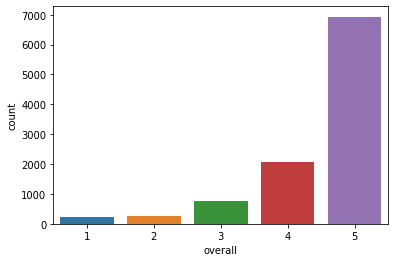

In [19]:
sns.countplot(x=df['overall'],data=df)

plot overall column on the basis of number of occurence

In [20]:
def rating(overall):
    if (int(overall <= 2)):   #negative feedback
        return 0
    elif(int(overall >= 4)):   #positive feedback
        return 1
    else:                         #neutral feedback
        return 2       
df['feedback'] = df['overall'].apply(rating)


categorise the overall rating into three types:

1. for 1 and 2 rating feedback should be negative

2. for 4 and 5 rating feedback should be positive

3. for 3 rating feedback should be neutral

In [21]:
df

,helpful,reviewText,overall,feedback
0,"[0, 0]","Not much to write about here, but it does exac...",5,1
1,"[13, 14]",The product does exactly as it should and is q...,5,1
2,"[1, 1]",The primary job of this device is to block the...,5,1
3,"[0, 0]",Nice windscreen protects my MXL mic and preven...,5,1
4,"[0, 0]",This pop filter is great. It looks and perform...,5,1
...,...,...,...,...
10256,"[0, 0]","Great, just as expected. Thank to all.Five Stars",5,1
10257,"[0, 0]",I've been thinking about trying the Nanoweb st...,5,1
10258,"[0, 0]",I have tried coated strings in the past ( incl...,4,1
10259,"[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4,1


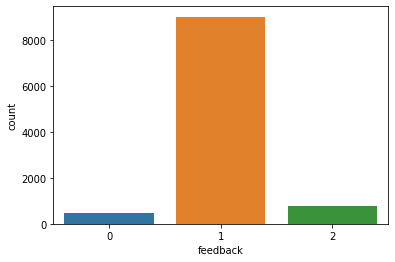

In [22]:
sns.countplot(x=df['feedback'],data=df)

In [23]:
def text_cleaning(text):
    '''
    Make text lowercase, remove text in square brackets,remove links,remove special characters
    and remove words containing numbers.
    '''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

create text cleaning function to remove punctuation,  special characters, square brackets, links

In [24]:
df['cleanedreviewText']=df['reviewText'].apply(text_cleaning)

apply text cleaning function on reviewtext 

In [25]:
df

,helpful,reviewText,overall,feedback,cleanedreviewText
0,"[0, 0]","Not much to write about here, but it does exac...",5,1,not much to write about here but it does exac...
1,"[13, 14]",The product does exactly as it should and is q...,5,1,the product does exactly as it should and is q...
2,"[1, 1]",The primary job of this device is to block the...,5,1,the primary job of this device is to block the...
3,"[0, 0]",Nice windscreen protects my MXL mic and preven...,5,1,nice windscreen protects my mxl mic and preven...
4,"[0, 0]",This pop filter is great. It looks and perform...,5,1,this pop filter is great it looks and perform...
...,...,...,...,...,...
10256,"[0, 0]","Great, just as expected. Thank to all.Five Stars",5,1,great just as expected thank to all five stars
10257,"[0, 0]",I've been thinking about trying the Nanoweb st...,5,1,i ve been thinking about trying the nanoweb st...
10258,"[0, 0]",I have tried coated strings in the past ( incl...,4,1,i have tried coated strings in the past incl...
10259,"[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4,1,well made by elixir and developed with taylor...


In [26]:
'''def remove_stopword(text):
    word=[w for w in text if w not in stopwords.words('english')]
    return word
df['reviewText']=df['reviewText'].apply(lambda x: remove_stopword(x))'''

"def remove_stopword(text):\n    word=[w for w in text if w not in stopwords.words('english')]\n    return word\ndf['reviewText']=df['reviewText'].apply(lambda x: remove_stopword(x))"

We can remove stopwords and plot wordcloud and also plot frequent words in positive,negative and neutral to get an idea that which word is most used by reviewers. 

( Unfortunately I couldn't run that because my system config is below par it got stuck)

In [27]:
x=df['cleanedreviewText']
y=df['feedback']

In [28]:
'''x1=df['cleanedreviewText']
y1=df['feedback']
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=0,test_size=0.3)
cv1=CountVectorizer(ngram_range=(1, 4))
x1_train=cv1.fit_transform(x1_train)
lr1=LogisticRegression(max_iter=1000).fit(x1_train,y1_train)
prediction1=lr1.predict(cv.fit_transform(x1_test))
score1=accuracy_score(y1_test,prediction1)
score1
confusion_matrix(y1_test, prediction1)'''

"x1=df['cleanedreviewText']\ny1=df['feedback']\nx1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=0,test_size=0.3)\ncv1=CountVectorizer(ngram_range=(1, 4))\nx1_train=cv1.fit_transform(x1_train)\nlr1=LogisticRegression(max_iter=1000).fit(x1_train,y1_train)\nprediction1=lr1.predict(cv.fit_transform(x1_test))\nscore1=accuracy_score(y1_test,prediction1)\nscore1\nconfusion_matrix(y1_test, prediction1)"

when we apply logistic regression or other classification alogrithm we will get accuracy of approx. 88% but when you test it on unseen data given by user it classified it incorrectly because the number of data which belongs to class 2 or 0 is far more less than number of data which belongs to class 1

In [29]:
cv=CountVectorizer(ngram_range=(1, 4))
x=cv.fit_transform(x)

CountVectorizer Convert a collection of text documents to a matrix of token counts

In [30]:
smt=SMOTE()
x,y = smt.fit_resample(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


since the given dataset is imbalanced we have to oversample the remaining other two class by SMOTE (Synthetic Minority Oversampling Technique) algorithm 


SMOTE(Synthetic Minority Oversampling Technique) :-> SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

split the original data into train and test dataset by train_test_split function by giving arugments test size 0.3 i.e. 30% test data and train data is 70%

In [32]:
lr=LogisticRegression(max_iter=1000).fit(x_train,y_train)

apply logistic regression algorithm and fit train data into it so that the model can learn the unknown parameters

In [33]:
prediction=lr.predict(x_test)
score=accuracy_score(y_test,prediction)

predict the accuracy of model by giving unknown dataset i.e test data

In [34]:
score

0.8864924821296525

In [35]:
confusion_matrix(y_test, prediction)

array([[2407,   58,  289],
       [  91, 2407,  182],
       [ 182,  119, 2379]])

confusion matrix tells that which datapoints classified into which class

In [36]:
def checking(testing):
  a=text_cleaning(testing)
  prediction=lr.predict(cv.transform([a]))
  print(prediction)
str=input("enter your review")
checking(str)

enter your reviewworst
[0]


it takes input from user and predict that which class it belongs to